In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("files/cleaned_Churn.csv")
df = df.drop("customerID",axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65


In [3]:
before = len(df)

df = df.drop_duplicates()
after = len(df)

removed = before-after
removed

22

In [4]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,0.902863,0.423159,0.870816,0.287566,0.345962,0.344965,0.291127,0.385558,0.993591,0.692636,0.592651,1.570716,0.264492,32.469449,64.851894,2290.342338
std,0.500017,0.368947,0.499797,0.458520,0.296166,0.494095,0.737076,0.452660,0.475715,0.475391,0.454314,0.486761,0.885842,0.834163,0.491376,1.067530,0.441094,24.534965,30.069001,2265.044153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,35.750000,411.150000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,29.000000,70.400000,1410.250000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,55.000000,89.900000,3801.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,72.000000,118.750000,8684.800000


In [5]:
df["PhoneService"].value_counts()

PhoneService
1    6339
0     682
Name: count, dtype: int64

In [6]:
df[['PhoneService', 'InternetService', 'MonthlyCharges']].corr()


,PhoneService,InternetService,MonthlyCharges
PhoneService,1.000000,0.387549,0.248984
InternetService,0.387549,1.000000,-0.320525
MonthlyCharges,0.248984,-0.320525,1.000000


In [7]:
pd.crosstab(df['PhoneService'], df['Churn'], normalize='index')  # See % who churned in each group


Churn,0,1
PhoneService,,
0,0.750733,0.249267
1,0.733870,0.266130


In [8]:

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1,0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [10]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,colsample_bytree=1,learning_rate=0.2,max_depth=3,n_estimators=100,subsample=1)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
y_pred = best_model.predict(X_test)

print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"\n Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


 Accuracy: 0.8014

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1053
           1       0.62      0.53      0.57       352

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.79      0.80      0.80      1405


 Confusion Matrix:
[[940 113]
 [166 186]]


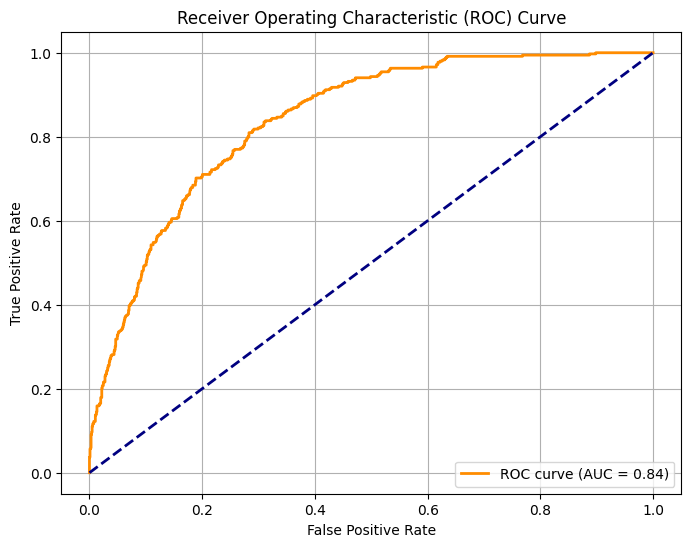

In [12]:
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [14]:
import joblib

joblib.dump(best_model, 'xgboost_churn_model.joblib')

['xgboost_churn_model.joblib']